In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats as st

# Загрузка датасетов из репозитория github

In [31]:
cardio_alco = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/cardio_alco.csv', sep=';')
cardio_base = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/cardio_base.csv')

covid = pd.read_csv('https://raw.githubusercontent.com/voleka-ocrv/turing_data_analyst/main/covid_data.csv')

# Question 1: 
Which country has the 3rd death rate? Death rate: total number of death per million inhabitants.
- [ ] Italy
- [x] **Andorra**
- [ ] USA
- [ ] Belgium
- [ ] Spain

In [17]:
covid_death_rate = covid.groupby('location').agg(
    total_death=pd.NamedAgg('new_deaths', 'sum'), 
    inhabitants=pd.NamedAgg('population', 'max'),
    )

covid_death_rate['death_rate'] = covid_death_rate['total_death']/(covid_death_rate['inhabitants']/1e6)

covid_death_rate.sort_values('death_rate', ascending=False).head(3)


,total_death,inhabitants,death_rate
location,,,
San Marino,42,33938.0,1237.550828
Belgium,9619,11589616.0,829.967102
Andorra,51,77265.0,660.066007


## Answer: 
Andorra

---
# Question 2: 

How tall are the tallest 1% of people?
- [ ] They are taller than 186 cm
- [ ] They are taller than 175 cm
- [ ] They are taller than 147 cm
- [x] **They are taller than 184 cm**
- [ ] They are taller than 191 cm

In [18]:
cardio_base['height'].quantile(0.99)

184.0

## Answer: 
They are taller than 184 cm

---
# Question 3: 

Which two features have the highest spearman rank correlation?
- [ ] Age and weight
- [ ] Age and blood preasure
- [x] **Blood preasure levels (ap_hi, ap_low)**
- [x] **Gender and height**

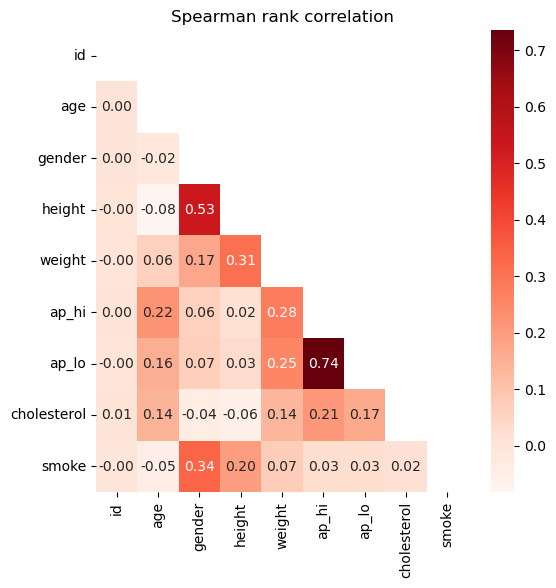

In [59]:
spearman_corr = cardio_base.corr(method='spearman')
mask = pd.DataFrame(np.triu(np.ones_like(spearman_corr)), index=spearman_corr.index, columns=spearman_corr.columns).replace({0: False, 1: True})

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Spearman rank correlation")
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap="Reds", mask=mask);

## Answer: 
- Blood preasure levels (ap_hi, ap_low) 
- Gender and height

---
# Question 4: 
Do people over 50 have higher cholesterol levels than the rest?
- [ ] Yes, their cholesterol level is 29% higher on average
- [x] No, it's about the same
- [ ] No, people over 50 have 7% lower cholesterol level
- [ ] Yes, their cholesterol level is 14% higher on average
- [ ] Yes, their cholesterol level is 19% higher on average

In [ ]:
# Note: In the original file Age is in days, we should calculate with age in years rounded down.
cardio_base['age'] = cardio_base['age'].transform(lambda x: int(math.floor(x/365)), axis=0)

In [100]:
cardio_base['cholesterol'].where(cardio_base['age'] > 50).mean() / cardio_base['cholesterol'].mean() - 1

0.04718033578232861

## Answer: 
No, it's about the same

---
# Question 5: 
How much heavier the age group with the highest average weight than the age group with the lowest average weight?
- [ ] 45% havier
- [x] 28% havier
- [ ] 13% havier
- [ ] 87% havier
- [ ] 9% havier

In [129]:
heavier_age_group = cardio_base.groupby('age')['weight'].mean().agg(['min', 'max'])
heavier_age_group['max'] / heavier_age_group['min'] - 1

0.2859952671226089

## Answer: 
28% havier

---
# Question 6: 
Which of the following statements is true with 95% confidence?
- [ ] Smokers have higher blood preassure than non-smokers
- [x] Smokers have higher cholisterol level than non-smokers
- [ ] Smokers weight less than non-smokers
- [x] Men have higher blood preassure than women

In [6]:
alpha = .05

### Smokers have higher blood preassure than non-smokers
False

In [26]:
print('''H0: Smokers and non-smokers have the same blood pressure\nH1: Smokers have higher blood preassure than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['ap_hi'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['ap_hi'] # non-smokeres

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")


if results.pvalue < alpha / 2 and sample_1 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same blood pressure
H1: Smokers have higher blood preassure than non-smokers
p-значение:  0.461244784929987
p-значение / 2:  0.2306223924649935
Smokers: 128.361
Non-smokers: 128.861
Do not reject null hypothesis H0


In [27]:
print('''H0: Smokers and non-smokers have the same blood pressure\nH1: Smokers have higher blood preassure than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['ap_lo'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['ap_lo'] # non-smokeres

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")


if results.pvalue < alpha / 2 and sample_1 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same blood pressure
H1: Smokers have higher blood preassure than non-smokers
p-значение:  0.13044186949533218
p-значение / 2:  0.06522093474766609
Smokers: 99.775
Non-smokers: 96.327
Do not reject null hypothesis H0


### Smokers have higher cholisterol level than non-smokers
True

In [21]:
print('''H0: Smokers and non-smokers have the same cholisterol level\nH1: Smokers have higher cholisterol level than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['cholesterol'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['cholesterol'] # non-smokeres
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() > sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same cholisterol level
H1: Smokers have higher cholisterol level than non-smokers
p-значение:  0.006222972569800228
p-значение / 2:  0.003111486284900114
Smokers: 1.390
Non-smokers: 1.365
Reject null hypothesis H0


### Smokers weight less than non-smokers
False

In [22]:
print('''H0: Smokers and non-smokers have the same weight\nH1: Smokers weight less than non-smokers''')
sample_1 = cardio_base[cardio_base['smoke'] == 1]['weight'] # smokeres
sample_2 = cardio_base[cardio_base['smoke'] == 0]['weight'] # non-smokeres
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Smokers and non-smokers have the same weight
H1: Smokers weight less than non-smokers
p-значение:  1.6785734402177582e-65
p-значение / 2:  8.392867201088791e-66
Smokers: 77.344
Non-smokers: 73.902
Do not reject null hypothesis H0


### Men have higher blood preassure than women
True

In [28]:
print('''H0: Men and women have the same blood pressure\nH1: Men have higher blood pressure than women''')
sample_1 = cardio_base[cardio_base['gender'] == 1]['ap_hi'] # women
sample_2 = cardio_base[cardio_base['gender'] == 2]['ap_hi'] # men
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Men and women have the same blood pressure
H1: Men have higher blood pressure than women
p-значение:  0.1038392595181402
p-значение / 2:  0.0519196297590701
Smokers: 128.139
Non-smokers: 130.079
Do not reject null hypothesis H0


Too small distinguish between p-value and alpha. So I'd reject H0 here.

In [29]:
print('''H0: Men and women have the same blood pressure\nH1: Men have higher blood pressure than women''')
sample_1 = cardio_base[cardio_base['gender'] == 1]['ap_lo'] # women
sample_2 = cardio_base[cardio_base['gender'] == 2]['ap_lo'] # men
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
print('p-значение / 2: ', results.pvalue / 2)
print(f"Smokers: {sample_1.mean():.3f}\nNon-smokers: {sample_2.mean():.3f}")

if results.pvalue < alpha / 2 and sample_1.mean() < sample_2.mean():
    print('Reject null hypothesis H0')
else:
    print('Do not reject null hypothesis H0')

H0: Men and women have the same blood pressure
H1: Men have higher blood pressure than women
p-значение:  0.00013735011856314677
p-значение / 2:  6.867505928157339e-05
Smokers: 94.523
Non-smokers: 100.552
Reject null hypothesis H0


## Answer: 
The fallowing statements are True:
- Smokers have higher cholisterol level than non-smokers
- Men have higher blood preassure than women

---
# Question 7: 
What is the probabilyty that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants?
- [ ] 92%
- [x] 88%
- [ ] 71%
- [ ] 54%
- [ ] 39%

In [457]:
covid_beds = covid.copy()

# Remove rows are relating to World at all (not to a specific country).
# and countries where we do not know about hospital beds number
covid_beds = covid_beds[~covid_beds['location'].isin(['World'])]
covid_beds = covid_beds[covid_beds['hospital_beds_per_thousand'].notna()]

In [458]:
cond = covid_beds['gdp_per_capita'] > 10000
covid_beds['gdp_A'] = '<= 10K'
covid_beds.loc[:, 'gdp_A'] = covid_beds['gdp_A'].mask(cond, '> 10K')

cond = covid_beds['hospital_beds_per_thousand'] >= 5
covid_beds['beds_B'] = '< 5'
covid_beds.loc[:, 'beds_B'] = covid_beds['beds_B'].mask(cond, '>= 5')

Here we use Bayes' Theorem
$$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$$
- A, B	=	events
- P(A|B)	=	probability of A given B is true
- P(B|A)	=	probability of B given A is true
- P(A), P(B)	=	the independent probabilities of A and B

What is the probabilyty that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants?
- A = {a country has GDP over $10 000}
- B = {a country has at least 5 hospital beds per 1000}
- P(A|B) = (posterior probability) the probability that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants
- P(A) = (prior probability)the probability that a country has GDP over $10 000
- P(B|A) = (likelihood) the probability that a country has at least 5 hospital beds per 1000 inhabitants given that it has had GDP over $10 000
- P(B) = (evidence) the probability that a country has at least 5 hospital beds per 100 (regardless its GDP) 
$$P(B) = \sum_{i=1}^n{P(B|A_i)*P(A_i)}$$

In [459]:
# P(A)
P_A = covid_beds['gdp_A'].value_counts(normalize=True)
# P(B)
P_B =covid_beds['beds_B'].value_counts(normalize=True)
# P(B|A)
P_B_and_A = covid_beds.groupby('gdp_A')['beds_B'].value_counts(normalize=True).sort_index(ascending=False)

We would like to know what is the probability that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants.

So, what have we already known?

If we did not know anything about hospital beds in the country we would say that the probability that it has GDP over $10 000 is **P(A)** - a prior probability.


In [460]:
print('P(A)')
P_A

P(A)


> 10K     0.665297
<= 10K    0.334703
Name: gdp_A, dtype: float64

But we just have known that the country has at least 5 hospital beds per 1000 inhabitants.

**P(A|B) = P(B|A) * P(A) / P(B)**

If a country has at least 5 hospital beds per 1000 inhabitants **P(B)** there are two posibilities **P(B|A)**: 
- either it has GDP over $10 000 - **P('>= 5'|'> 10K')**,
- or its GDP is equal or less than $10 000 - **P('>= 5'|'<= 10K')**.

In [461]:
print('P(B|A)')
P_B_and_A

P(B|A)


gdp_A   beds_B
> 10K   >= 5      0.237330
        < 5       0.762670
<= 10K  >= 5      0.079018
        < 5       0.920982
Name: beds_B, dtype: float64

In [467]:
print(f'''
P('>= 5'|'> 10K') = {P_B_and_A.loc[('> 10K', '>= 5')]:.6f} 
P('>= 5'|'<= 10K') = {P_B_and_A.loc[('<= 10K', '>= 5')]:.6f}''')


P('>= 5'|'> 10K') = 0.237330 
P('>= 5'|'<= 10K') = 0.079018


In [468]:
print(f'''
P(B) = sum(P(B|A) * P(A))
P('>= 5') = P('>= 5'|'> 10K') * P('> 10K') + P('>= 5'|'<= 10K') * P('<= 10K')
P('>= 5') = {P_B_and_A.loc[('> 10K', '>= 5')]:.6f} * {P_A['> 10K']:.6f} + {P_B_and_A.loc[('<= 10K', '>= 5')]:.6f} * {P_A['<= 10K']:.6f} = {P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'] + P_B_and_A.loc[('<= 10K', '>= 5')] * P_A['<= 10K']:.6f}''')


P(B) = sum(P(B|A) * P(A))
P('>= 5') = P('>= 5'|'> 10K') * P('> 10K') + P('>= 5'|'<= 10K') * P('<= 10K')
P('>= 5') = 0.237330 * 0.665297 + 0.079018 * 0.334703 = 0.184342


In [464]:
print('P(B)')
P_B

P(B)


< 5     0.815658
>= 5    0.184342
Name: beds_B, dtype: float64

In [469]:
print(f'''Thus, the probatility, that the country has GPR over 10K given that it has at least 5 hospital beds per 1000 inhabitants is:
P(A|B) = P(B|A) * P(A) / P(B)
P('> 10K'|'> 5') = P('>= 5'|'> 10K) * P('> 10K') / P('>= 5')
P(B|A) * P(A) = P('>= 5'|'> 10K) * P('> 10K') = {round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'], 2)}
P(B) = P('>= 5') = {round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'] + P_B_and_A.loc[('<= 10K', '>= 5')] * P_A['<= 10K'], 2)}
P(A|B) = {round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'], 2) / round(P_B_and_A.loc[('> 10K', '>= 5')] * P_A['> 10K'] + P_B_and_A.loc[('<= 10K', '>= 5')] * P_A['<= 10K'], 2)}
''')

Thus, the probatility, that the country has GPR over 10K given that it has at least 5 hospital beds per 1000 inhabitants is:
P(A|B) = P(B|A) * P(A) / P(B)
P('> 10K'|'> 5') = P('>= 5'|'> 10K) * P('> 10K') / P('>= 5')
P(B|A) * P(A) = P('>= 5'|'> 10K) * P('> 10K') = 0.16
P(B) = P('>= 5') = 0.18
P(A|B) = 0.888888888888889



The same conclusions we can make with confusion_matrix.

In [466]:
confusion_matrix = pd.crosstab(covid_beds['beds_B'], covid_beds['gdp_A'], normalize=True)
confusion_matrix.loc['sum', :] = confusion_matrix.sum(axis=0)
confusion_matrix.loc[:, 'sum'] = confusion_matrix.sum(axis=1)
confusion_matrix.style.applymap(lambda x: f"background-color: #e6ffe6; color: green;", subset=('>= 5', ['> 10K', 'sum'])).format('{:.2f}')

gdp_A,<= 10K,> 10K,sum
beds_B,,,
< 5,0.31,0.51,0.82
>= 5,0.03,0.16,0.18
sum,0.33,0.67,1.00


## Answer: 
88%